# Analysis 1
What kind of player will be admitted into the hall of fame in baseball?
We can analyize the question from different perspectives. Such as:
player's biographic data analysis.
player's baseball skill analysis.
there always be another exception.

In [45]:
#Importing all the libraries that are required for this analysis
import os
import numpy as np
import pandas as pd
import seaborn as sb


In [46]:
from matplotlib import pyplot as plt


Here the data that we going to extract and explore is from year 1939.

In [47]:
hallOfFame = pd.read_csv("D:/Users/vin/Desktop/FinalProject-Python/the-history-of-baseball/hall_of_fame.csv")
hallOfFame = hallOfFame[hallOfFame.category == "Player"]
famousPerson = hallOfFame[hallOfFame.category == "Player"][hallOfFame.inducted == "Y"]


1. Here we are trying to analyze, how many people enter into the Hall of Fame each year?
We know that the count is not always the same. We can see this with the help of a barchart, which helps us realize that, the person who is very popular is not choosen as the popular player every year or at some point of time we do not choose anyone and sometimes we choose many. Below is the analysis done for the same.

In [48]:
famousPerson.groupby("yearid").size().describe()

count    74.000000
mean      3.337838
std       2.234702
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max      13.000000
dtype: float64

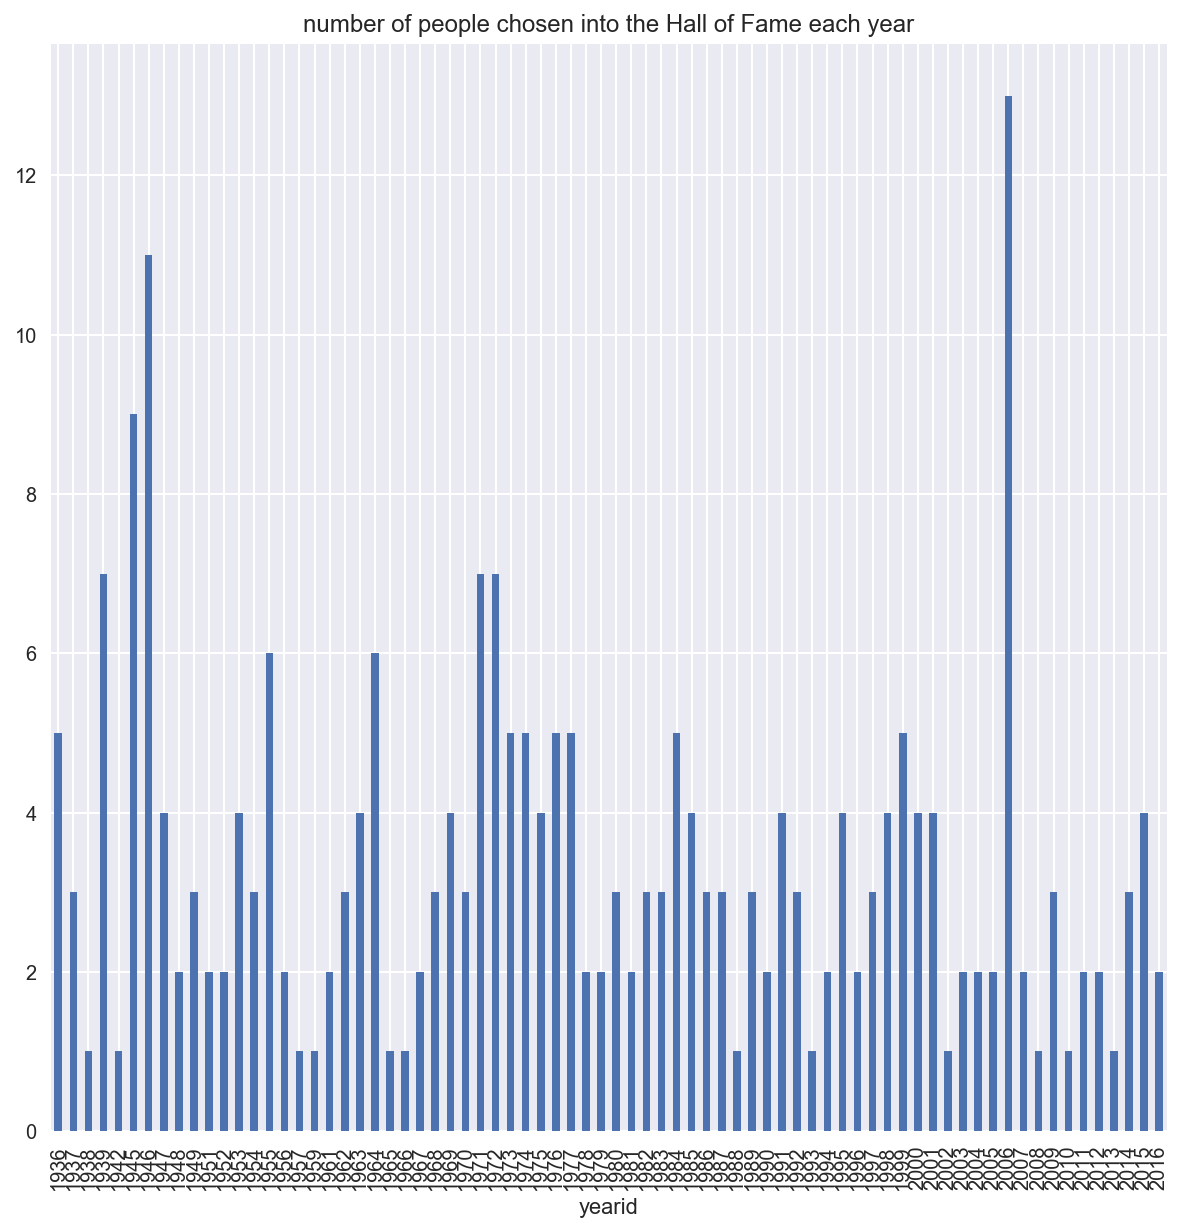

In [50]:
famousPerson.groupby("yearid").size().plot.bar(figsize=(10,10),title="number of people chosen into the Hall of Fame each year")

2. Here we are trying to analyze how many votes we need to get admitted to Hall of Fame. 
We know that votes that we need to enter in the Hall of Fame is changing drastically. In another words, the more people show interest in baseball, the more player needs votes to enter into the Hall of Fame.

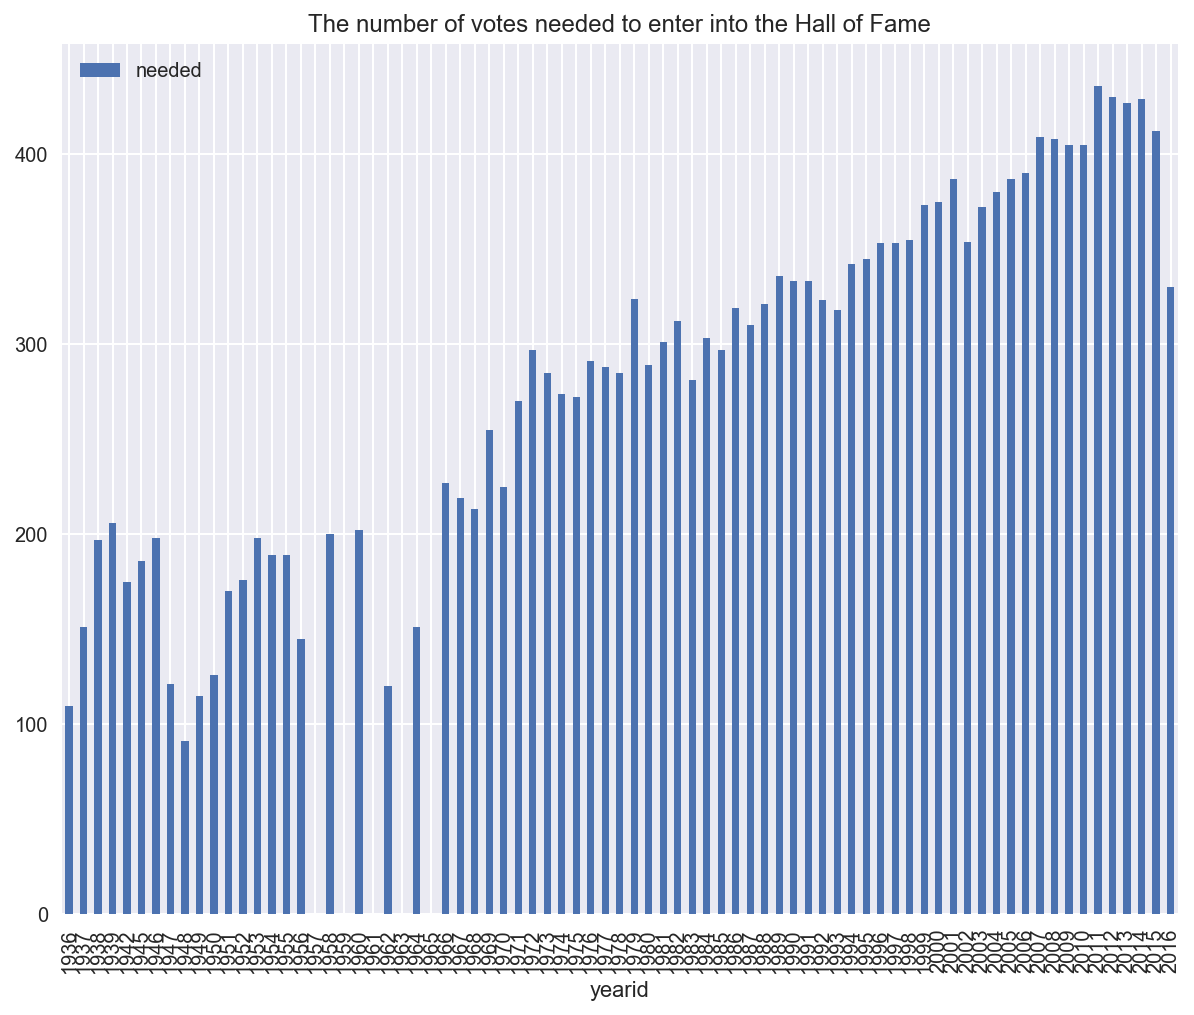

In [72]:
hallOfFame[["yearid","needed"]].groupby("yearid").mean().fillna(0).plot.bar(figsize=(10,8),title="The number of votes needed to enter into the Hall of Fame")

Demographic Attribute

In [53]:
player = pd.read_csv("D:/Users/vin/Desktop/FinalProject-Python/the-history-of-baseball/player.csv",parse_dates=["debut","final_game"])

In [54]:
player["serviceYear"] = player["final_game"] - player["debut"]

In [55]:
player = player.join(hallOfFame[hallOfFame.inducted == "Y"][["player_id","inducted"]].set_index("player_id"),\
                     on="player_id")
player.inducted.fillna("N",inplace=True)

In [56]:
print(player.info())
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 26 columns):
player_id        18846 non-null object
birth_year       18703 non-null float64
birth_month      18531 non-null float64
birth_day        18382 non-null float64
birth_country    18773 non-null object
birth_state      18220 non-null object
birth_city       18647 non-null object
death_year       9336 non-null float64
death_month      9335 non-null float64
death_day        9334 non-null float64
death_country    9329 non-null object
death_state      9277 non-null object
death_city       9325 non-null object
name_first       18807 non-null object
name_last        18846 non-null object
name_given       18807 non-null object
weight           17975 non-null float64
height           18041 non-null float64
bats             17655 non-null object
throws           17868 non-null object
debut            18653 non-null datetime64[ns]
final_game       18653 non-null datetime64[ns]
retro_id       

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,death_country,death_state,death_city,name_first,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id,serviceYear,inducted
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,4156 days,N
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,8209 days,Y
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,3456 days,N
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,4817 days,N
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,1676 days,N


3. Here we are exploring everything about a player, i.e. his service year and all.

In [57]:
player.describe()

,birth_year,birth_month,birth_day,death_year,death_month,death_day,weight,height,serviceYear
count,18703.000000,18531.000000,18382.000000,9336.000000,9335.000000,9334.000000,17975.000000,18041.000000,18653
mean,1930.664118,6.627327,15.609020,1963.850364,6.484092,15.570281,185.980862,72.255640,1762 days 01:36:48.481209
std,41.229079,3.467110,8.748942,31.506369,3.528685,8.778580,21.226988,2.598983,1835 days 09:05:07.904037
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000,-4 days +00:00:00
25%,1894.000000,4.000000,8.000000,1942.000000,3.000000,8.000000,170.000000,71.000000,137 days 00:00:00
50%,1936.000000,7.000000,16.000000,1966.000000,6.000000,15.000000,185.000000,72.000000,1165 days 00:00:00
75%,1968.000000,10.000000,23.000000,1989.000000,10.000000,23.000000,200.000000,74.000000,2933 days 00:00:00
max,1995.000000,12.000000,31.000000,2016.000000,12.000000,31.000000,320.000000,83.000000,12862 days 00:00:00


In [17]:
player[player["serviceYear"] < pd.Timedelta("1 days")].head()

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,death_country,death_state,death_city,name_first,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id,serviceYear,inducted
20,abercda01,1850.0,1.0,2.0,USA,OK,Fort Towson,1939.0,11.0,11.0,USA,PA,Philadelphia,Frank,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,1871-10-21,aberd101,abercda01,0 days,N
22,abernbi01,1929.0,1.0,30.0,USA,CA,Torrance,2006.0,2.0,19.0,USA,CA,Yucaipa,Bill,Abernathie,William Edward,190.0,70.0,R,R,1952-09-27,1952-09-27,aberb101,abernbi01,0 days,N
76,adamsji01,1868.0,NaN,NaN,USA,IL,East St. Louis,NaN,NaN,NaN,NaN,NaN,NaN,Jim,Adams,James J.,148.0,66.0,NaN,R,1890-04-21,1890-04-21,adamj101,adamsji01,0 days,N
77,adamsjo01,1877.0,10.0,28.0,USA,IL,Cowden,1952.0,10.0,8.0,USA,MO,Bachelor,Joe,Adams,Joseph Edward,190.0,72.0,R,L,1902-04-26,1902-04-26,adamj102,adamsjo01,0 days,N
107,adkinhe01,1874.0,1.0,19.0,USA,MO,Fulton,1953.0,1.0,2.0,USA,MO,Mexico,Harry,Atkinson,John Harry,NaN,NaN,NaN,NaN,1895-09-25,1895-09-25,adkih101,adkinhe01,0 days,N


4. Here we see that A player's finalGame time is earlier than the debut time. This is surprising here in the baseball.

In [18]:
player[player["serviceYear"] < pd.Timedelta("0 days")]

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,death_country,death_state,death_city,name_first,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id,serviceYear,inducted
11360,menzete01,1897.0,11.0,4.0,USA,MO,St. Louis,1969.0,12.0,23.0,USA,MO,St. Louis,Ted,Menze,Theodore Charles,172.0,69.0,R,R,1918-04-27,1918-04-23,menzt101,menzete01,-4 days,N


Here we are trying to find out who has played for a longer duration in the baseball career.

In [ ]:
player.loc[player["serviceYear"].argmax()]

Altrock Nicholas, serves about 30yrs. We also see that he is not a part of  Hall of Fame.

5. Here we see that the person with less experience in baseball or the person who is youngest among everyone, gets to play very rarely. We can say this by the analysis that we have done and observing that only one person who is very young had gotten a chance to become the basket ball champion and rest are are very experienced.

In [59]:
player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]').describe()

count    221.000000
mean      17.307692
std        4.139102
min        0.000000
25%       15.000000
50%       17.000000
75%       20.000000
max       32.000000
Name: serviceYear, dtype: float64

In [21]:
player[player.inducted == "Y"][player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]')<1]

,player_id,birth_year,birth_month,birth_day,birth_country,birth_state,birth_city,death_year,death_month,death_day,death_country,death_state,death_city,name_first,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id,serviceYear,inducted
2041,brownwi02,1915.0,6.0,26.0,USA,LA,Shreveport,1996.0,8.0,4.0,USA,TX,Houston,Willard,Brown,Willard Jessie,200.0,71.0,R,R,1947-07-19,1947-08-17,broww101,brownwi02,29 days,Y


D:\Users\vin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


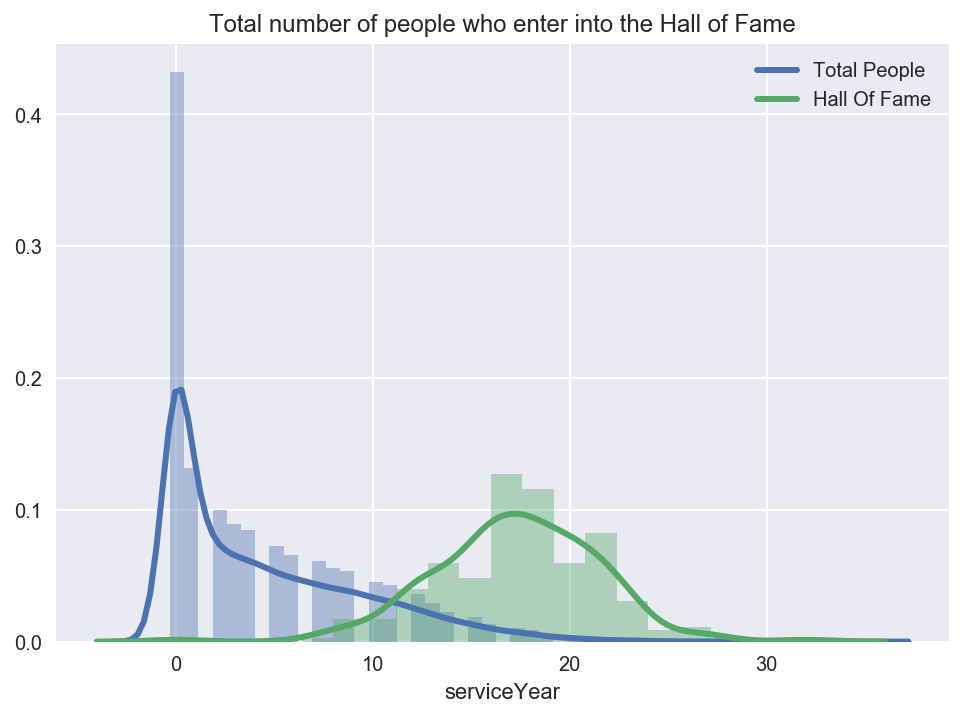

In [61]:
sb.distplot(player.serviceYear.astype('timedelta64[Y]').dropna(),\
            kde_kws={"lw":3,"label":"Total People"})
g = sb.distplot(player[player.inducted == "Y"].serviceYear.astype('timedelta64[Y]').dropna(),\
             kde_kws={"lw": 3, "label": "Hall Of Fame"})
g.set_title("Total number of people who enter into the Hall of Fame")

6. Here we are finding out the height and weight of a person 

D:\Users\vin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


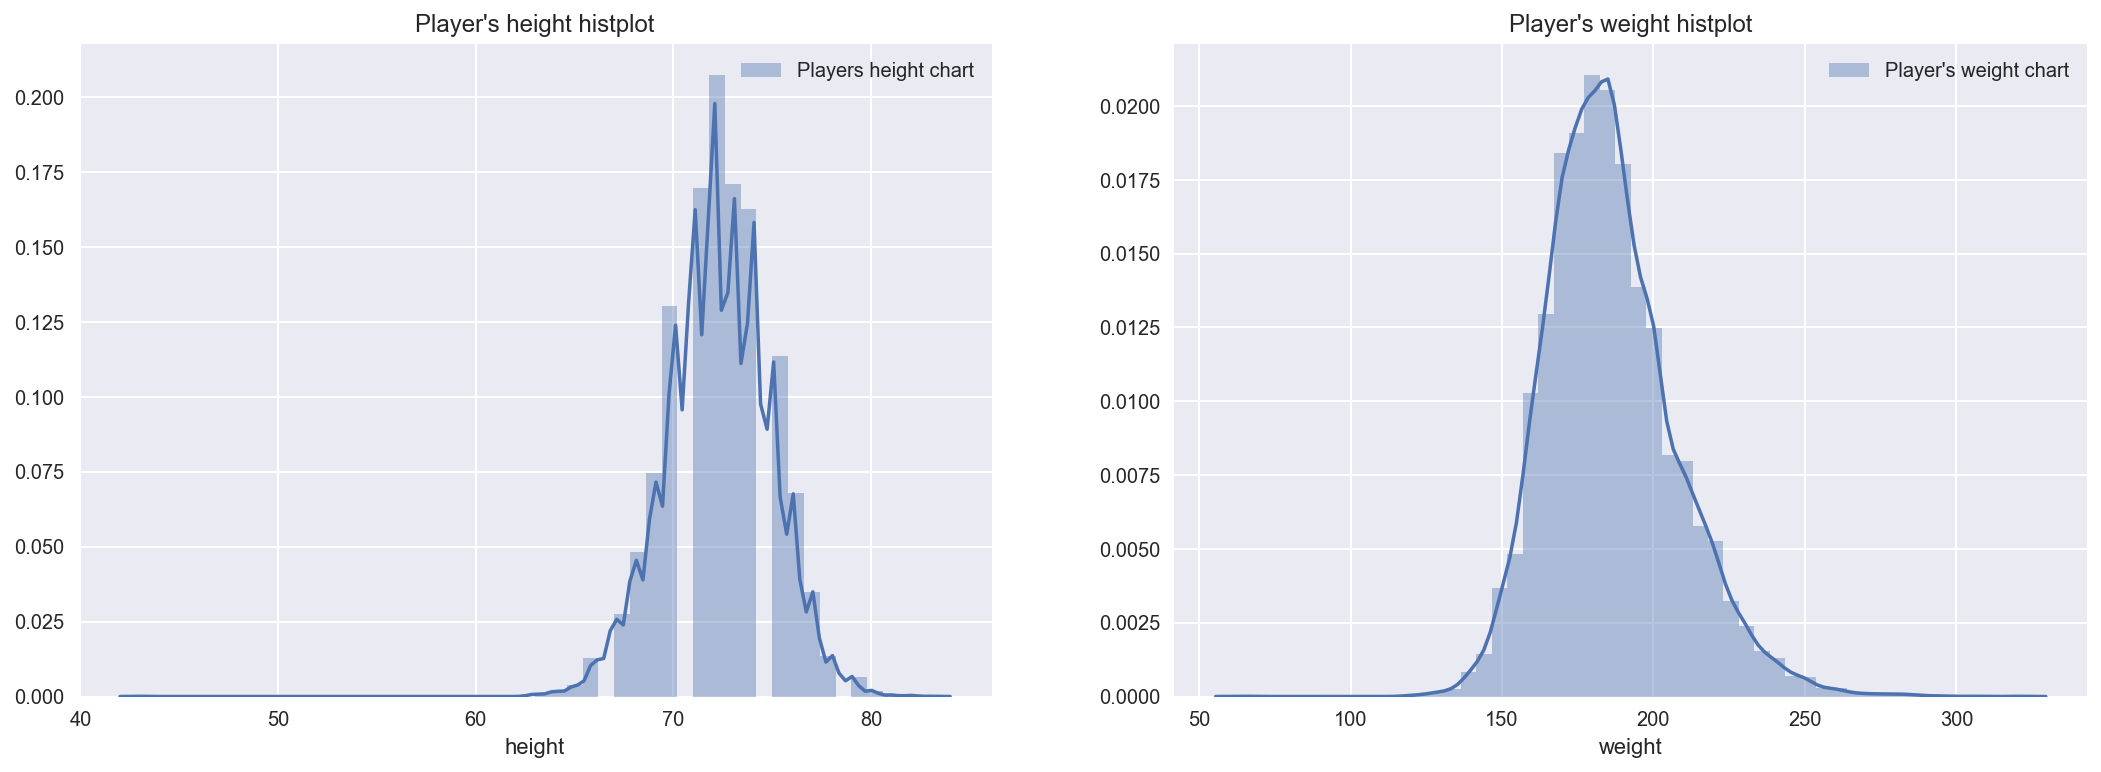

In [63]:
fig,axes_w_h = plt.subplots(1,2,figsize=(18,6))
sb.distplot(player["height"].dropna(),ax=axes_w_h[0],hist_kws={"label":"Players height chart"})
axes_w_h[0].set_title("Player's height histplot")
axes_w_h[0].legend()
sb.distplot(player["weight"].dropna(),ax=axes_w_h[1],hist_kws={"label":"Player's weight chart"})
axes_w_h[1].set_title("Player's weight histplot")
axes_w_h[1].legend()

We can see that, the person chosen to enter into the Hall of Fame, his height and weight lies somewhere in the center of the graph. 

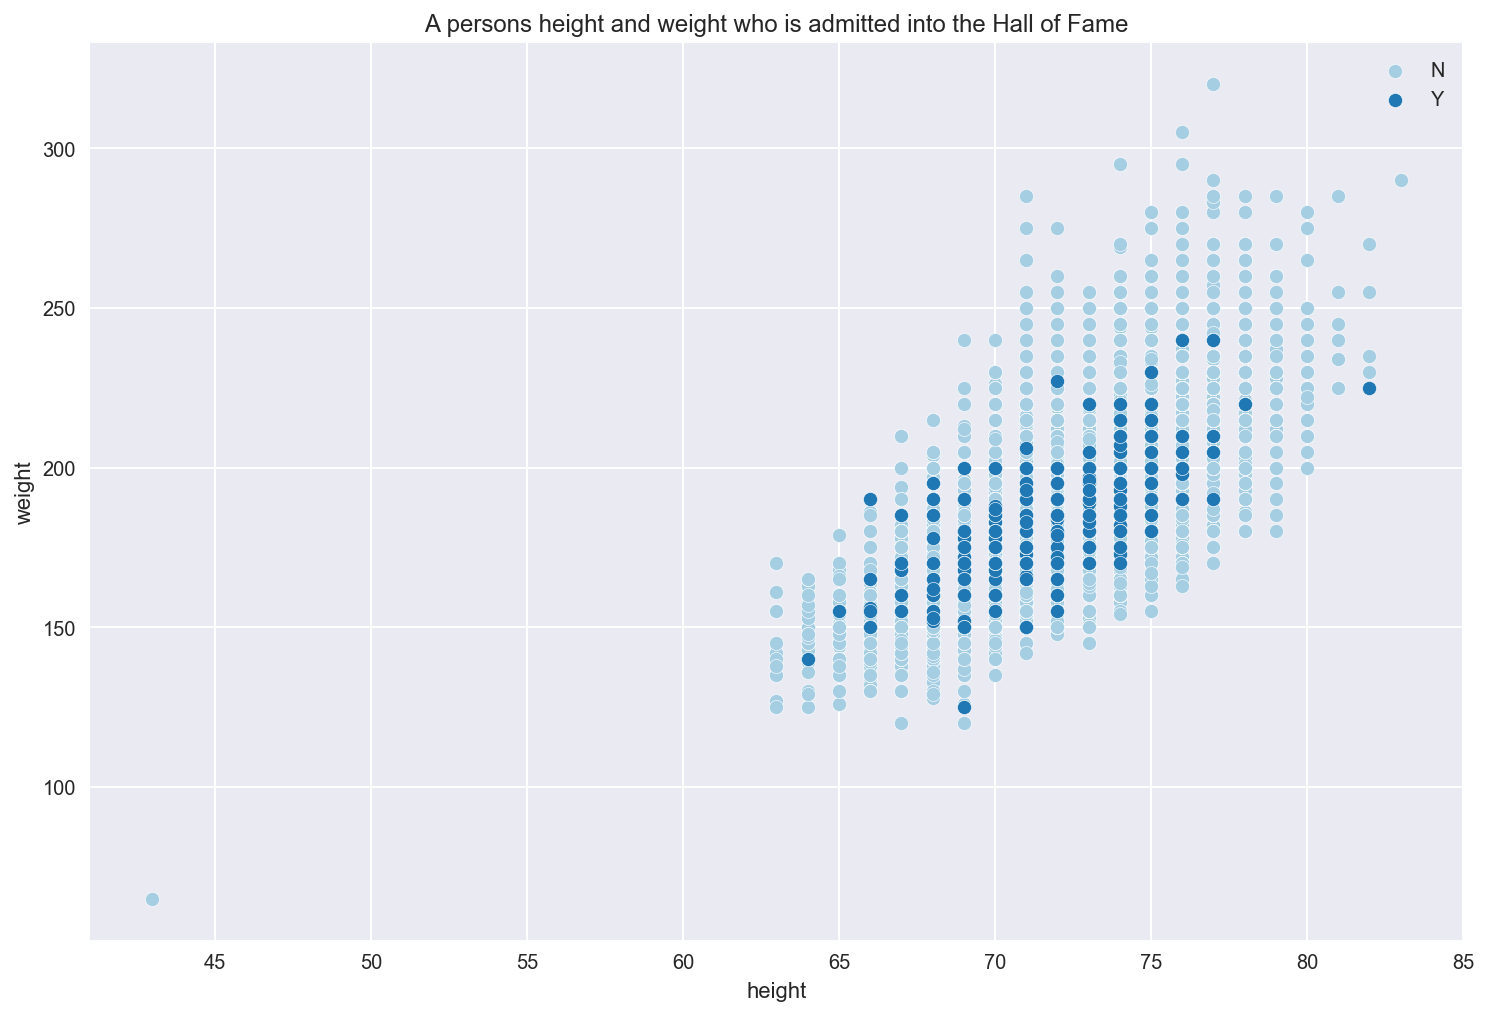

In [66]:
g = sb.FacetGrid(player, hue="inducted", size=7,aspect=1.5,palette=sns.color_palette(sns.color_palette("Paired")))
g.map(plt.scatter, "height", "weight", s=50, edgecolor="white")
plt.title("A persons height and weight who is admitted into the Hall of Fame")
plt.legend()